## Anisotropy

Anisotrpy means that the token representations coming from the models are not uniformly distributed in the embedding space (Ethayarajh, 2019). In other words, All tokens share very similar representations (Cai et al, 2021).</br>
In this tutorial, we will observe this phenomenon by plotting the similarity among the tokens (Su et al, 2022).


### Import Libraries

In [4]:
import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn.functional as F

from transformers import AutoModel, AutoTokenizer

### Function for Similarity Plot

First, we pass a sentence to the model to obtain the token representations. Then we compute the similarities between each two tokens and plot them in a matrix.

In [5]:
def compute_similarity_matrix(model, tokenizer, text):
    text = '[CLS] ' + text.strip('\n') + ' [SEP]'
    token_list = tokenizer.tokenize(text)
    input_ids = torch.LongTensor(tokenizer.convert_tokens_to_ids(token_list)).view(1,-1)
    _, seq_len = input_ids.size()
    hidden = model(input_ids).last_hidden_state
    norm_hidden = hidden / hidden.norm(dim=2, keepdim=True)
    correlation_matrix = torch.matmul(norm_hidden, norm_hidden.transpose(1,2)).view(seq_len, seq_len)
    return correlation_matrix.detach().numpy(), token_list

### Observe Similarity Matrix for BERT

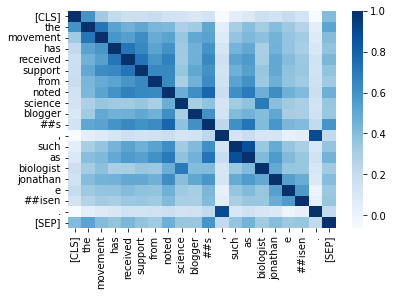

In [6]:
# load BERT
model_name = 'bert-base-uncased'
model = AutoModel.from_pretrained(model_name)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)


text = "The movement has received support from noted science bloggers, such as biologist Jonathan Eisen."
bert_res, token_list = compute_similarity_matrix(model, tokenizer, text)

# Create a dataset
df = pd.DataFrame(bert_res, 
                  index=token_list,
                  columns=token_list)


sns.heatmap(df, cmap="Blues")
plt.show()

As we can see, the similarities among the tokens are high, meaning that the tokens are located very closely to other. This shows that the obtained representations are not uniformly distributed in the embedding space and thus suffers from anisotropy problem.

### References
1. Ethayarajh. How Contextual are Contextualized Word Representations? Comparing the Geometry of BERT, ELMo, and GPT-2 Embeddings. EMNLP-IJCNLP, 2019. [[Paper]](https://aclanthology.org/D19-1006/)</br>
2. Cai et al. Isotropy in the Contextual Embedding Space: Clusters and Manifolds. ICLR, 2021. [[Paper]](https://openreview.net/forum?id=xYGNO86OWDH)</br>
3. Su et al. TaCL: Improving BERT Pre-training with Token-aware Contrastive Learning. NAACL, 2022. [[Paper]](https://arxiv.org/abs/2111.04198)</br>